# Seaborn
---
 seaborn 是matpyplot的封装，有很多好用的模板

In [2]:
import seaborn as sns
import numpy as np
import matplotlib as mpl
import matplotlib.pyplot as plt
#%matplotlib inline

In [3]:
def sinplot(flip=1):
    x = np.linspace(0,14,100)
    for i in range(1,7):
        plt.plot(x,np.sin(x+i*.5)*(7-i)*flip)

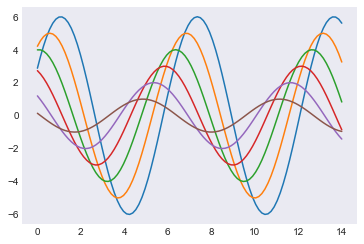

In [11]:
# 设置风格
sns.set_style('dark')

sinplot()

# 去掉顶部和右边的轴
sns.despine()

## 5 种主题风格
- darkgrid
- whitegrid
- dark
- white
- ticks

In [ ]:
sns.set_style('whilegrid')
